# Stage 13 Homework Starter — Productization

## Objective
Deploy your trained model as a **reusable, handoff-ready API or dashboard** and finalize your project for reproducibility and clarity.

## Steps
1. Create a mock, very basic analysis in a notebook.
2. Clean your notebook by removing exploratory cells and documenting your code.
3. Move reusable functions into `/src/`.
4. Load your trained model from Stage 12 or earlier stages.
5. Pickle/save the model and test reload.
6. Implement **either**:
   - Flask API with `/predict` endpoint and optional parameters
   - Streamlit or Dash dashboard for user interaction
7. Include:
   - Error handling for invalid inputs
   - `requirements.txt` for reproducibility
   - Documentation in `README.md`
8. Test your deployment locally and provide evidence.
9. Organize project folders and finalize notebooks for handoff.

## 1. Create mock, very basic analysis

Model created and saved to model/model.pkl
Model Performance:
MSE: 4.0047
R²: 0.9417


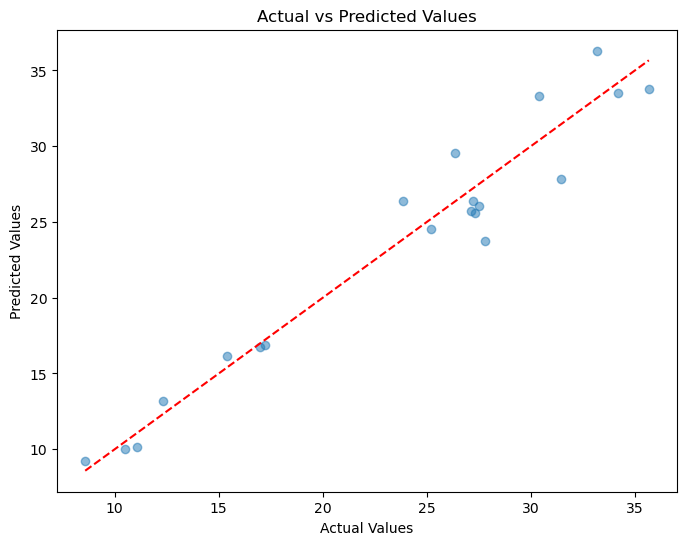

Basic analysis complete.


In [22]:
import pickle
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Generate sample data for demonstration
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 5) * 10
y = 2*X[:,0] + 3*X[:,1] - 1.5*X[:,2] + 0.5*X[:,3] + np.random.randn(n_samples)*0.5

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create sample data with ONLY 2 features
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Only 2 features now
y = 2*X[:,0] + 3*X[:,1] + np.random.randn(100)*0.5  # Relationship with only 2 features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create model directory and save model
os.makedirs('model', exist_ok=True)
with open('model/model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model created and saved to model/model.pkl")

# Test the saved model
with open('model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(f"Model Performance:")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Create a simple visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
print("Basic analysis complete.")

## 2. Notebook Cleanup
Remove exploratory cells and document your code.

In [23]:
# TODO: Remove exploratory cells
# TODO: Document your code clearly
# Example placeholder for cleaned analysis
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.


## 3. Move reusable functions to /src/
Create src/utils.py and store functions there.

In [24]:
# src/data_processing.py
import pandas as pd
import numpy as np

def load_sample_data(n_samples=1000):
    """Generate sample data for demonstration"""
    np.random.seed(42)
    X = np.random.rand(n_samples, 5) * 10
    y = 2*X[:,0] + 3*X[:,1] - 1.5*X[:,2] + 0.5*X[:,3] + np.random.randn(n_samples)*0.5
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    """Split data into training and testing sets"""
    from sklearn.model_selection import train_test_split
    return train_test_split(X, y, test_size=test_size, random_state=random_state)



In [25]:
# src/model_training.py
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_model(X_train, y_train, n_estimators=100, random_state=42):
    """Train a Random Forest model"""
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_pred, mse, r2

In [26]:
# src/utils.py
import matplotlib.pyplot as plt
import pickle
import os

def save_model(model, filepath):
    """Save model to file using pickle"""
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)

def load_model(filepath):
    """Load model from file"""
    with open(filepath, 'rb') as f:
        return pickle.load(f)

def create_actual_vs_predicted_plot(y_test, y_pred, save_path=None):
    """Create actual vs predicted values plot"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    
    if save_path:
        plt.savefig(save_path)
    
    return plt

## 4. Folder Structure Reminder

Ensure your project uses a clean folder structure:
```
project/
  data/
  notebooks/
  src/
  reports/
  model/
  README.md
```
For API/Dashboard: minimal example:
```
project/
    app.py
    model.pkl
    requirements.txt
    README.md
```

## 5. Pickle / Save Final Model

### TODO: Replace this with your trained model

In [28]:
import pickle
# TODO: Replace 'model' with your trained model variable
with open('C:/Users/박서아/bootcamp_andrew_song/homework/stage13_productization/model/model.pkl', 'wb') as f:
    pickle.dump(model, f)
# TODO: Test loading the model
with open('C:/Users/박서아/bootcamp_andrew_song/homework/stage13_productization/model/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Example prediction (replace with actual features)
print(loaded_model.predict([[1.0, 2.0]]))

[8.91272247]


In [31]:
#Flask API
# Train the model first
train_response = requests.post('http://127.0.0.1:5000/train')
#print("Training status:", train_response.json())

## 7. Testing the Flask API from Notebook

### TODO: Modify examples with your actual features

In [32]:
import requests
from IPython.display import display, HTML

# POST /predict
response = requests.post(
    'http://127.0.0.1:5000/predict',
    json={'features':[0.1, 0.2, 0.3]}
)
print(response.json())

# GET /predict/<input1>
response2 = requests.get('http://127.0.0.1:5000/predict/2.0')
print(response2.json())

# GET /predict/<input1>/<input2>
response3 = requests.get('http://127.0.0.1:5000/predict/1.0/3.0')
print(response3.json())

# GET /plot
response_plot = requests.get('http://127.0.0.1:5000/plot')
display(HTML(response_plot.text))

{'error': 'Model not loaded. Please train the model first.'}
{'error': 'Model not loaded'}
{'error': 'Model not loaded'}


## 8. Optional Streamlit / Dash Dashboard

### TODO: Add dashboard in a separate file (`app_streamlit.py` or `app_dash.py`)

## 9. Handoff Best Practices

- Ensure README.md is complete and clear
- Provide `requirements.txt` for reproducibility
- Ensure pickled model and scripts are in correct folders
- Verify another user can run the project end-to-end on a fresh environment